In [1]:
import pandas as pd
df=pd.read_csv("C:\\Users\\HP\Desktop\\train.csv")
df=df.drop("subject",axis=1)
df


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,WALKING_UPSTAIRS


In [2]:
# types of feature selection
#1.Filter based feature selection technique
#2.Embaded based feature selection technique
#3.Wrapper feature selection technique

In [3]:
#1.Filter based feature selection technique
#a.deleting duplicate columns
#b.variance thresold technique
#c.corelation matrix technique
#d. Annova based feature selection technique
#e.Chi2 based feature selection technique
#f.Mutual info feature selection technique

In [4]:
X=df.drop("Activity",axis=1)
y=df["Activity"]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [6]:
#a.deleting duplicate columns
def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [7]:
#this function removed duplicate columns
print(X_train.shape)
print(X_test.shape)
duplicate_columns=get_duplicate_columns(X_train)
X_train=X_train.drop(duplicate_columns,axis=1)
X_test=X_test.drop(duplicate_columns,axis=1)
print(X_train.shape)
print(X_test.shape)
columns=X_train.columns
columns

(5881, 561)
(1471, 561)
(5881, 542)
(1471, 542)


Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=542)

In [8]:
#b.variance thresold technique

from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=.05)

vt.fit(X_train)



VarianceThreshold(threshold=0.05)

In [9]:
columns=columns[vt.get_support()]
X_train=vt.transform(X_train)

In [10]:
X_test=vt.transform(X_test)
X_train=pd.DataFrame(X_train,columns=columns)
X_test=pd.DataFrame(X_test,columns=columns)
print(X_train.shape)
print(X_test.shape)

(5881, 351)
(1471, 351)


In [11]:
#c.corelation matrix technique
corr_matrix=X_train.corr()
corr_matrix

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-std()-X,1.000000,0.927247,0.850268,0.998631,0.920936,0.845200,0.981284,0.893743,0.843918,-0.966714,...,-0.061190,0.152159,0.118286,-0.042353,-0.027089,0.023914,-0.035176,-0.374114,0.472605,0.393209
tBodyAcc-std()-Y,0.927247,1.000000,0.895065,0.922627,0.997384,0.894128,0.917831,0.953852,0.882782,-0.937472,...,-0.103492,0.210313,0.179834,-0.023759,-0.012484,-0.002241,-0.028881,-0.383095,0.524945,0.432180
tBodyAcc-std()-Z,0.850268,0.895065,1.000000,0.842986,0.890973,0.997414,0.852711,0.864716,0.936311,-0.861033,...,-0.095347,0.157032,0.124579,-0.009647,-0.020843,-0.010535,-0.016002,-0.344114,0.475241,0.480824
tBodyAcc-mad()-X,0.998631,0.922627,0.842986,1.000000,0.916201,0.838010,0.973704,0.888702,0.838024,-0.962447,...,-0.055098,0.153494,0.120750,-0.049949,-0.026887,0.024098,-0.035629,-0.370629,0.467965,0.389139
tBodyAcc-mad()-Y,0.920936,0.997384,0.890973,0.916201,1.000000,0.890707,0.911283,0.950131,0.877793,-0.932521,...,-0.101235,0.205346,0.175966,-0.027747,-0.011823,-0.005865,-0.026679,-0.379578,0.526803,0.430548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.023914,-0.002241,-0.010535,0.024098,-0.005865,-0.014838,0.029230,-0.000207,-0.023622,-0.008700,...,-0.024274,0.031310,0.021829,-0.006297,0.013870,1.000000,-0.104987,-0.009878,-0.006218,-0.011178
"angle(tBodyGyroJerkMean,gravityMean)",-0.035176,-0.028881,-0.016002,-0.035629,-0.026679,-0.016949,-0.038935,-0.013144,-0.011510,0.030630,...,-0.000472,-0.030566,-0.028829,-0.025656,0.030850,-0.104987,1.000000,0.027310,-0.009582,-0.009311
"angle(X,gravityMean)",-0.374114,-0.383095,-0.344114,-0.370629,-0.379578,-0.346350,-0.386159,-0.373556,-0.345776,0.365571,...,0.077000,-0.086273,-0.081381,0.012546,0.022038,-0.009878,0.027310,1.000000,-0.784098,-0.642642
"angle(Y,gravityMean)",0.472605,0.524945,0.475241,0.467965,0.526803,0.476498,0.482312,0.489971,0.462052,-0.471464,...,-0.093215,0.086150,0.078420,-0.003872,-0.005159,-0.006218,-0.009582,-0.784098,1.000000,0.596205


In [12]:
#function to remove all columns having corelation mpore than 95%
columns_to_drop=set({})
columns=corr_matrix.columns
def corr_func():
    for x in range(corr_matrix.shape[1]):
        for y in range(x+1,corr_matrix.shape[1]):
            if corr_matrix.iloc[x,y]>.95:
                columns_to_drop.add(columns[y])
    return columns_to_drop
            

In [13]:
columns_to_drop=corr_func()
X_train=X_train.drop(columns_to_drop,axis=1)
X_test=X_test.drop(columns_to_drop,axis=1)

In [14]:
print(X_train.shape)
print(X_test.shape)
y_train.shape

(5881, 152)
(1471, 152)


(5881,)

In [15]:
#d.Annova based feature selection technique
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
columns=X_train.columns

sel = SelectKBest(f_classif, k=100).fit(X_train, y_train)
columns=X_train.columns[sel.get_support()]


In [16]:
X_train=sel.transform(X_train)
X_test=sel.transform(X_test)
type(X_train)
X_train=pd.DataFrame(X_train,columns=columns)
X_test=pd.DataFrame(X_test,columns=columns)
print(X_train.shape)
print(X_test.shape)

(5881, 100)
(1471, 100)


In [17]:
titanic=pd.read_csv("C:\\Users\\HP\\Desktop\\tested.csv")[['Pclass','Sex','SibSp','Parch','Embarked','Survived']]
titanic

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,0,0,Q,0
1,3,female,1,0,S,1
2,2,male,0,0,Q,0
3,3,male,0,0,S,0
4,3,female,1,1,S,1
...,...,...,...,...,...,...
413,3,male,0,0,S,0
414,1,female,0,0,C,1
415,3,male,0,0,S,0
416,3,male,0,0,S,0


In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
titanic_encoded = titanic.apply(le.fit_transform)
titanic_encoded

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,2,1,0,0,1,0
1,2,0,1,0,2,1
2,1,1,0,0,1,0
3,2,1,0,0,2,0
4,2,0,1,1,2,1
...,...,...,...,...,...,...
413,2,1,0,0,2,0
414,0,0,0,0,0,1
415,2,1,0,0,2,0
416,2,1,0,0,2,0


In [19]:
X=titanic_encoded.drop("Survived",axis=1)
y=titanic_encoded[["Survived"]]

In [20]:
from sklearn.feature_selection import chi2
p_values=chi2(X,y)
feature_imp=pd.Series(chi2(X,y)[1],index=titanic_encoded.columns[:-1])
feature_imp

Pclass      9.696334e-02
Sex         6.336158e-35
SibSp       7.313228e-03
Parch       4.088696e-07
Embarked    2.609380e-01
dtype: float64

<Axes: >

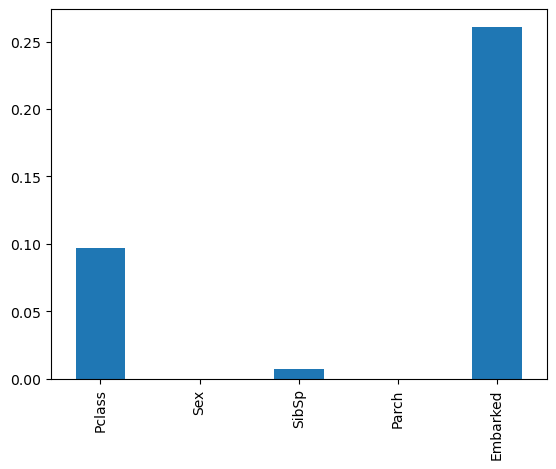

In [21]:
feature_imp.plot(kind='bar')

In [22]:
X=titanic_encoded.drop("Survived",axis=1)
y=titanic_encoded[["Survived"]]

In [23]:
from sklearn.feature_selection import mutual_info_classif,SelectKBest
mi=mutual_info_classif(X,y)

C:\Users\HP\anaconda3\new\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
sel=SelectKBest(mutual_info_classif,k=2).fit(X,y)
titanic_encoded.columns[:-1][sel.get_support()]

C:\Users\HP\anaconda3\new\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['Sex', 'Parch'], dtype='object')

In [25]:
#2.Embaded based feature selection technique
!pip install mlxtend

In [26]:
# Wrapper feature selection
#a.Exchaustive Feature Selection
#b.Backword Feature Selection
#c.Forward Feature Selection

In [27]:
data=pd.read_csv("E:\\Desktop\\SQL\\IPL\\iris.csv").drop("Id",axis=1)
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [28]:
#a.Exchaustive Feature Selection
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [29]:
from sklearn.model_selection import train_test_split,cross_val_score
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [30]:
X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,:-1],data["Species"],test_size=.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [31]:
efs=EFS(lr,max_features=3,scoring='accuracy',cv=5)
efs

ExhaustiveFeatureSelector(estimator=LogisticRegression(), max_features=3)

In [32]:
efs.fit(X_train,y_train)
efs.best_score_

Features: 14/14

0.9666666666666666

In [33]:
efs.best_feature_names_

('SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm')

In [34]:
pd.DataFrame(efs.subsets_).T

,feature_idx,cv_scores,avg_score,feature_names
0,"(0,)","[0.75, 0.625, 0.75, 0.8333333333333334, 0.6666...",0.725,"(SepalLengthCm,)"
1,"(1,)","[0.5, 0.5833333333333334, 0.625, 0.5, 0.625]",0.566667,"(SepalWidthCm,)"
2,"(2,)","[1.0, 0.9166666666666666, 0.8333333333333334, ...",0.925,"(PetalLengthCm,)"
3,"(3,)","[0.9583333333333334, 1.0, 0.8333333333333334, ...",0.95,"(PetalWidthCm,)"
4,"(0, 1)","[0.7083333333333334, 0.75, 0.875, 0.8333333333...",0.783333,"(SepalLengthCm, SepalWidthCm)"
5,"(0, 2)","[1.0, 0.9166666666666666, 0.8333333333333334, ...",0.933333,"(SepalLengthCm, PetalLengthCm)"
6,"(0, 3)","[0.9583333333333334, 1.0, 0.8333333333333334, ...",0.941667,"(SepalLengthCm, PetalWidthCm)"
7,"(1, 2)","[1.0, 0.9166666666666666, 0.875, 0.95833333333...",0.941667,"(SepalWidthCm, PetalLengthCm)"
8,"(1, 3)","[0.9166666666666666, 1.0, 0.8333333333333334, ...",0.933333,"(SepalWidthCm, PetalWidthCm)"
9,"(2, 3)","[1.0, 0.9583333333333334, 0.875, 1.0, 0.958333...",0.958333,"(PetalLengthCm, PetalWidthCm)"


In [35]:
#b.Backword Feature Selection
#c.ForwardFeature Selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
le=LabelEncoder()
y=le.fit_transform(data.iloc[:,-1])
X=data.iloc[:,:-1]
lr=LinearRegression()

In [36]:
sfs=SFS(lr,k_features="best",floating=False,forward=True,cv=5,scoring='r2')
X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,:-1],y,test_size=.2,random_state=42)

In [37]:
sfs.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 4),
                          scoring='r2')

In [38]:
sfs.k_feature_idx_

(0, 2, 3)

In [39]:
pd.DataFrame(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[0.8960395906282572, 0.9465964613365113, 0.846...",0.897374,"(PetalWidthCm,)",0.043143,0.033566,0.016783
2,"(2, 3)","[0.9087254959878095, 0.9406405594673724, 0.882...",0.908721,"(PetalLengthCm, PetalWidthCm)",0.024188,0.018819,0.009409
3,"(0, 2, 3)","[0.9196492916967143, 0.9398651098521348, 0.894...",0.913654,"(SepalLengthCm, PetalLengthCm, PetalWidthCm)",0.0245,0.019061,0.009531
4,"(0, 1, 2, 3)","[0.9201166613036688, 0.9414192323158794, 0.895...",0.912015,"(SepalLengthCm, SepalWidthCm, PetalLengthCm, P...",0.023413,0.018216,0.009108


In [40]:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=lr, n_features_to_select=2)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=2)

In [41]:
rfe.ranking_

array([2, 3, 1, 1])

In [42]:
columns=X_train.columns
columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [43]:
# Here two features with rank 1 are top 2 features
pd.DataFrame(rfe.ranking_,columns=[["Ranking"]],index=columns)

,Ranking
SepalLengthCm,2
SepalWidthCm,3
PetalLengthCm,1
PetalWidthCm,1


In [44]:
diabetes=pd.read_csv("E:\\Desktop\\boston housing\\diabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [45]:
# Wrapper Feature Selection Method
#a.Linear Regression 
#b.Regularization
#c.Tree based method

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr=LinearRegression()
X=diabetes.iloc[:,:-1]
y=diabetes.iloc[:,-1]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
lr.coef_

array([ 0.01046818,  0.00563353, -0.00228103,  0.00053209, -0.00027815,
        0.01503864,  0.11126264,  0.00646027])

In [49]:
lr.intercept_

-0.9487546338208497

In [50]:
pd.DataFrame(lr.coef_,index=X_train.columns,columns=[["Feature_importance"]])

,Feature_importance
Pregnancies,0.010468
Glucose,0.005634
BloodPressure,-0.002281
SkinThickness,0.000532
Insulin,-0.000278
BMI,0.015039
DiabetesPedigreeFunction,0.111263
Age,0.006460


In [51]:
#b.Regularization
#Lasso
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=.001)
X=diabetes.iloc[:,:-1]
y=diabetes.iloc[:,-1]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [53]:
lasso.coef_

array([ 0.01031842,  0.00564403, -0.00227653,  0.00055532, -0.00027643,
        0.01504247,  0.10195102,  0.00647779])

In [54]:
pd.DataFrame(lasso.coef_,index=X_train.columns,columns=[["Feature_importance"]])

,Feature_importance
Pregnancies,0.010318
Glucose,0.005644
BloodPressure,-0.002277
SkinThickness,0.000555
Insulin,-0.000276
BMI,0.015042
DiabetesPedigreeFunction,0.101951
Age,0.006478


In [55]:
#Ridge Regression
from sklearn.linear_model import Ridge
rr=Ridge(alpha=1)

In [56]:
rr.fit(X_train,y_train)

Ridge(alpha=1)

In [57]:
pd.DataFrame(rr.coef_,index=X_train.columns,columns=[["Features_importannce"]])

,Features_importannce
Pregnancies,0.010459
Glucose,0.005635
BloodPressure,-0.002281
SkinThickness,0.000537
Insulin,-0.000278
BMI,0.015042
DiabetesPedigreeFunction,0.109595
Age,0.006462


In [58]:
#Tree based feature selection
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [59]:
dt.feature_importances_

array([0.06574842, 0.30941723, 0.12958776, 0.06494241, 0.07429517,
       0.1748937 , 0.09382566, 0.08728965])

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier()

In [62]:
rfr.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
rfr.feature_importances_

array([0.08194948, 0.24304226, 0.08910315, 0.06826211, 0.07775188,
       0.1628381 , 0.12334894, 0.15370408])

In [66]:
pd.DataFrame(rfr.feature_importances_,index=X_train.columns,columns=[["Feature_importances"]])

,Feature_importances
Pregnancies,0.081949
Glucose,0.243042
BloodPressure,0.089103
SkinThickness,0.068262
Insulin,0.077752
BMI,0.162838
DiabetesPedigreeFunction,0.123349
Age,0.153704
